<a href="https://colab.research.google.com/github/rik634/ML/blob/main/Iris_dataset_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X = data.drop(['Id', 'Species'], axis=1)
y = data['Species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


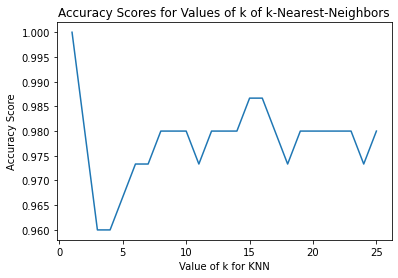

In [ ]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

### Train a Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(90, 4)
(90,)
(60, 4)
(60,)


In [ ]:
predictions = svc_model.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      0.95      0.98        21
 Iris-virginica       0.95      1.00      0.97        19

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60



In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(classification_report(y_test,grid_predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.95      0.95      0.95        21
 Iris-virginica       0.95      0.95      0.95        19

       accuracy                           0.97        60
      macro avg       0.97      0.97      0.97        60
   weighted avg       0.97      0.97      0.97        60



SVC() model

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC()

In [ ]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................. C=10, gamma=0.01, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ................................. C=10, gamma=0.01, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................................ C=10, gamma=0.001, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................................ C=10, gamma=0.001, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
lr_clf = LogisticRegression()
lr_clf.fit(X, y)
y_pred = lr_clf.predict(X)
print(metrics.accuracy_score(y, y_pred))

params = {'C': [0.1,1, 10, 100],
          "solver": ["liblinear"]}

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

0.9733333333333334
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best parameters: {'C': 4.281332398719396, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 96.67%
_______________________________________________
CLASSIFICATION REPORT:
           Iris-setosa  Iris-versicolor  ...  macro avg  weighted avg
precision          1.0         0.964286  ...   0.967262      0.966964
recall             1.0         0.931034  ...   0.966259      0.966667
f1-score           1.0         0.947368  ...   0.966583      0.966639
support           30.0        29.000000  ...  90.000000     90.000000

[4 rows x 6 columns]
_______________________________________________
Confusion Matrix: 
 [[30  0  0]
 [ 0 27  2]
 [ 0  1 30]]

Test Result:
Accuracy Score: 93.33%
_______________________________________________
CLASSIFICATION REPORT:
           Iris-setosa  Iris-versicolor  ...  macro avg  weighted avg
precision          1.0         0.947368  ...   0.934837      0.936341
recall             1.0         0.857143  ...   0.934837      0.933333
f1-score           1.0         0

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [ ]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,96.666667,93.333333


K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 96.67%
_______________________________________________
CLASSIFICATION REPORT:
           Iris-setosa  Iris-versicolor  ...  macro avg  weighted avg
precision          1.0         0.933333  ...   0.966667      0.967037
recall             1.0         0.965517  ...   0.967000      0.966667
f1-score           1.0         0.949153  ...   0.966657      0.966676
support           30.0        29.000000  ...  90.000000     90.000000

[4 rows x 6 columns]
_______________________________________________
Confusion Matrix: 
 [[30  0  0]
 [ 0 28  1]
 [ 0  2 29]]

Test Result:
Accuracy Score: 96.67%
_______________________________________________
CLASSIFICATION REPORT:
           Iris-setosa  Iris-versicolor  ...  macro avg  weighted avg
precision          1.0         0.913043  ...   0.971014      0.969565
recall             1.0         1.000000  ...   0.964912      0.966667
f1-score           1.0         0.954545  ...   0.966330      0.966498
support           20.0     

In [ ]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,96.666667,93.333333
1,K-nearest neighbors,96.666667,96.666667


Support Vector Machine

In [ ]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 96.67%
_______________________________________________
CLASSIFICATION REPORT:
           Iris-setosa  Iris-versicolor  ...  macro avg  weighted avg
precision          1.0         0.964286  ...   0.967262      0.966964
recall             1.0         0.931034  ...   0.966259      0.966667
f1-score           1.0         0.947368  ...   0.966583      0.966639
support           30.0        29.000000  ...  90.000000     90.000000

[4 rows x 6 columns]
_______________________________________________
Confusion Matrix: 
 [[30  0  0]
 [ 0 27  2]
 [ 0  1 30]]

Test Result:
Accuracy Score: 98.33%
_______________________________________________
CLASSIFICATION REPORT:
           Iris-setosa  Iris-versicolor  ...  macro avg  weighted avg
precision          1.0         1.000000  ...   0.983333      0.984167
recall             1.0         0.952381  ...   0.984127      0.983333
f1-score           1.0         0.975610  ...   0.983323      0.983344
support           20.0     

In [ ]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,96.666667,93.333333
1,K-nearest neighbors,96.666667,96.666667
2,Support Vector Machine,96.666667,98.333333


Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
           Iris-setosa  Iris-versicolor  ...  macro avg  weighted avg
precision          1.0              1.0  ...        1.0           1.0
recall             1.0              1.0  ...        1.0           1.0
f1-score           1.0              1.0  ...        1.0           1.0
support           30.0             29.0  ...       90.0          90.0

[4 rows x 6 columns]
_______________________________________________
Confusion Matrix: 
 [[30  0  0]
 [ 0 29  0]
 [ 0  0 31]]

Test Result:
Accuracy Score: 96.67%
_______________________________________________
CLASSIFICATION REPORT:
           Iris-setosa  Iris-versicolor  ...  macro avg  weighted avg
precision          1.0         1.000000  ...   0.968254      0.969841
recall             1.0         0.904762  ...   0.968254      0.966667
f1-score           1.0         0.950000  ...   0.966667      0.966667
support           20.0    

In [ ]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,96.666667,93.333333
1,K-nearest neighbors,96.666667,96.666667
2,Support Vector Machine,96.666667,98.333333
3,Decision Tree Classifier,100.000000,96.666667


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
           Iris-setosa  Iris-versicolor  ...  macro avg  weighted avg
precision          1.0              1.0  ...        1.0           1.0
recall             1.0              1.0  ...        1.0           1.0
f1-score           1.0              1.0  ...        1.0           1.0
support           30.0             29.0  ...       90.0          90.0

[4 rows x 6 columns]
_______________________________________________
Confusion Matrix: 
 [[30  0  0]
 [ 0 29  0]
 [ 0  0 31]]

Test Result:
Accuracy Score: 95.00%
_______________________________________________
CLASSIFICATION REPORT:
           Iris-setosa  Iris-versicolor  ...  macro avg  weighted avg
precision          1.0         0.909091  ...   0.951178      0.950589
recall             1.0         0.952381  ...   0.949039      0.950000
f1-score           1.0         0.930233  ...   0.949717      0.949906
support           20.0    

In [ ]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,96.666667,93.333333
1,K-nearest neighbors,96.666667,96.666667
2,Support Vector Machine,96.666667,98.333333
3,Decision Tree Classifier,100.000000,96.666667
4,Random Forest Classifier,100.000000,95.000000


XGBoost Classifer

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
           Iris-setosa  Iris-versicolor  ...  macro avg  weighted avg
precision          1.0              1.0  ...        1.0           1.0
recall             1.0              1.0  ...        1.0           1.0
f1-score           1.0              1.0  ...        1.0           1.0
support           30.0             29.0  ...       90.0          90.0

[4 rows x 6 columns]
_______________________________________________
Confusion Matrix: 
 [[30  0  0]
 [ 0 29  0]
 [ 0  0 31]]

Test Result:
Accuracy Score: 95.00%
_______________________________________________
CLASSIFICATION REPORT:
           Iris-setosa  Iris-versicolor  ...  macro avg  weighted avg
precision          1.0         0.909091  ...   0.951178      0.950589
recall             1.0         0.952381  ...   0.949039      0.950000
f1-score           1.0         0.930233  ...   0.949717      0.949906
support           20.0    

In [ ]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,96.666667,93.333333
1,K-nearest neighbors,96.666667,96.666667
2,Support Vector Machine,96.666667,98.333333
3,Decision Tree Classifier,100.000000,96.666667
4,Random Forest Classifier,100.000000,95.000000
5,XGBoost Classifier,100.000000,95.000000


### Using Hyperparameter Tuning

Logistic Regression Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best parameters: {'C': 4.281332398719396, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 96.67%
_______________________________________________
CLASSIFICATION REPORT:
           Iris-setosa  Iris-versicolor  ...  macro avg  weighted avg
precision          1.0         0.964286  ...   0.967262      0.966964
recall             1.0         0.931034  ...   0.966259      0.966667
f1-score           1.0         0.947368  ...   0.966583      0.966639
support           30.0        29.000000  ...  90.000000     90.000000

[4 rows x 6 columns]
_______________________________________________
Confusion Matrix: 
 [[30  0  0]
 [ 0 27  2]
 [ 0  1 30]]

Test Result:
Accuracy Score: 93.33%
_______________________________________________
CLASSIFICATION REPORT:
           Iris-setosa  Iris-versicolor  ...  macro avg  weighted avg
precision          1.0         0.947368  ...   0.934837      0.936341
recall             1.0         0.857143  ...   0.934837      0.933333
f1-score           1.0         0

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [ ]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,96.666667,93.333333


K-nearest neighbors Hyperparameter Tuning

In [ ]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
#     test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum KNN score on the test data: 100.00%


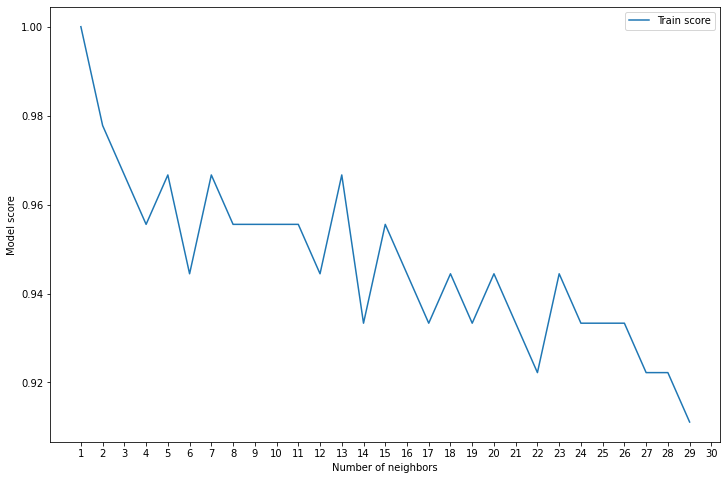

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 31, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

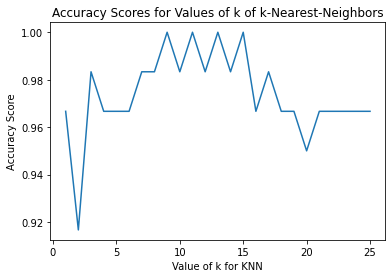

In [ ]:
# experimenting with different n values
k_range = list(range(1,26,))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=27)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 92.22%
_______________________________________________
CLASSIFICATION REPORT:
           Iris-setosa  Iris-versicolor  ...  macro avg  weighted avg
precision          1.0         0.843750  ...   0.924107      0.925050
recall             1.0         0.931034  ...   0.923248      0.922222
f1-score           1.0         0.885246  ...   0.922201      0.922157
support           30.0        29.000000  ...  90.000000     90.000000

[4 rows x 6 columns]
_______________________________________________
Confusion Matrix: 
 [[30  0  0]
 [ 0 27  2]
 [ 0  5 26]]

Test Result:
Accuracy Score: 95.00%
_______________________________________________
CLASSIFICATION REPORT:
           Iris-setosa  Iris-versicolor  ...  macro avg  weighted avg
precision          1.0         0.875000  ...   0.958333      0.956250
recall             1.0         1.000000  ...   0.947368      0.950000
f1-score           1.0         0.933333  ...   0.949206      0.949524
support           20.0     

In [ ]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,96.666667,93.333333
1,Tuned K-nearest neighbors,92.222222,95.000000


Support Vector Machine Hyperparameter Tuning

In [ ]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {'C': [0.1,1, 10, 100], 
          'gamma': [1,0.1,0.01,0.001], 
          'kernel':['linear', 'poly', 'rbf']}
svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best params: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Train Result:
Accuracy Score: 98.89%
_______________________________________________
CLASSIFICATION REPORT:
           Iris-setosa  Iris-versicolor  ...  macro avg  weighted avg
precision          1.0         1.000000  ...   0.989583      0.989236
recall             1.0         0.965517  ...   0.988506      0.988889
f1-score           1.0         0.982456  ...   0.988861      0.988880
support           30.0        29.000000  ...  90.000000     90.000000

[4 rows x 6 columns]
_______________________________________________
Confusion Matrix: 
 [[30  0  0]
 [ 0 28  1]
 [ 0  0 31]]

Test Result:
Accuracy Score: 98.33%
_______________________________________________
CLASSIFICATION REPORT:
           Iris-setosa  Iris-versicolor  ...  macro avg  weighted avg
precision          1.0         1.000000  ...   0.983333      0.984167
recall             1.0         0.952381  ...   0.984127      0.983333
f1-score           1.0         0.975610  ..

[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.8s finished


In [ ]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,96.666667,93.333333
1,Tuned K-nearest neighbors,92.222222,95.000000
2,Tuned Support Vector Machine,98.888889,98.333333


Decision Tree Classifier Hyperparameter Tuning

In [ ]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 12978 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 12993 out of 12996 | elapsed:   33.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   33.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Best_params: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Train Result:
Accuracy Score: 81.11%
_______________________________________________
CLASSIFICATION REPORT:
           Iris-setosa  Iris-versicolor  ...  macro avg  weighted avg
precision     1.000000         0.630435  ...   0.876812      0.880918
recall        0.933333         1.000000  ...   0.816487      0.811111
f1-score      0.965517         0.773333  ...   0.806567      0.805540
support      30.000000        29.000000  ...  90.000000     90.000000

[4 rows x 6 columns]
_______________________________________________
Confusion Matrix: 
 [[28  2  0]
 [ 0 29  0]
 [ 0 15 16]]

Test Result:
Accuracy Score: 85.00%
_______________________________________________
CLASSIFICATION REPORT:
           Iris-setosa  Iris-versicolor  ...  macro avg  weighted avg
precision          1.0         0.700000  ...   0.900000      0.895000
recall             1.0         1.000000  ...   

In [ ]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,96.666667,93.333333
1,Tuned K-nearest neighbors,92.222222,95.000000
2,Tuned Support Vector Machine,98.888889,98.333333
3,Tuned Decision Tree Classifier,81.111111,85.000000


Random Forest Classifier Hyperparameter Tuning

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 53.3min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed: 67.5min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 83.6min
[Parallel(n_jobs=-1)]: Done 4897 tasks      | elapsed: 101.2min
[Parallel(n_jobs=-1)]: Done 5828 tasks      | elapsed: 120.5min
[Parallel(n_jobs=-1)]: Done 6841 tasks      | elapsed: 139.7min
[Parallel(n_jobs=-1)]: Done 7934 tasks      | elapsed: 156.5min
[Parallel(n_jobs=-1)]: Done 9109 tasks    

Best parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1200}
Train Result:
Accuracy Score: 98.89%
_______________________________________________
CLASSIFICATION REPORT:
           Iris-setosa  Iris-versicolor  ...  macro avg  weighted avg
precision          1.0         0.966667  ...   0.988889      0.989259
recall             1.0         1.000000  ...   0.989247      0.988889
f1-score           1.0         0.983051  ...   0.988886      0.988892
support           30.0        29.000000  ...  90.000000     90.000000

[4 rows x 6 columns]
_______________________________________________
Confusion Matrix: 
 [[30  0  0]
 [ 0 29  0]
 [ 0  1 30]]

Test Result:
Accuracy Score: 95.00%
_______________________________________________
CLASSIFICATION REPORT:
           Iris-setosa  Iris-versicolor  ...  macro avg  weighted avg
precision          1.0         0.909091  ...   0.951178      0.950589
recall             1

In [ ]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,96.666667,93.333333
1,Tuned K-nearest neighbors,92.222222,95.000000
2,Tuned Support Vector Machine,98.888889,98.333333
3,Tuned Decision Tree Classifier,81.111111,85.000000
4,Tuned Random Forest Classifier,98.888889,95.000000


XGBoost Classifier Hyperparameter Tuning

In [ ]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 0.99]
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]

params_grid = {
    'n_estimators': n_estimators, 'max_depth': max_depth,
    'learning_rate' : learning_rate, 'min_child_weight' : min_child_weight, 
    'booster' : booster, 'base_score' : base_score
                      }

xgb_clf = XGBClassifier()

xgb_cv = GridSearchCV(xgb_clf, params_grid, cv=3, scoring = 'accuracy',n_jobs =-1, verbose=1)


xgb_cv.fit(X_train, y_train)
best_params = xgb_cv.best_params_
print(f"Best paramters: {best_params}")

xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 3200 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 822 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 1522 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2422 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3522 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4822 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 6322 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 8022 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 9597 out of 9600 | elapsed:  7.6min remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 9600 out of 9600 | elapsed:  7.6min finished


Best paramters: {'base_score': 0.25, 'booster': 'gbtree', 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100}
Train Result:
Accuracy Score: 97.78%
_______________________________________________
CLASSIFICATION REPORT:
           Iris-setosa  Iris-versicolor  ...  macro avg  weighted avg
precision          1.0         0.965517  ...   0.977753      0.977778
recall             1.0         0.965517  ...   0.977753      0.977778
f1-score           1.0         0.965517  ...   0.977753      0.977778
support           30.0        29.000000  ...  90.000000     90.000000

[4 rows x 6 columns]
_______________________________________________
Confusion Matrix: 
 [[30  0  0]
 [ 0 28  1]
 [ 0  1 30]]

Test Result:
Accuracy Score: 95.00%
_______________________________________________
CLASSIFICATION REPORT:
           Iris-setosa  Iris-versicolor  ...  macro avg  weighted avg
precision          1.0         0.909091  ...   0.951178      0.950589
recall             1.0    

In [ ]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,96.666667,93.333333
1,Tuned K-nearest neighbors,92.222222,95.000000
2,Tuned Support Vector Machine,98.888889,98.333333
3,Tuned Decision Tree Classifier,81.111111,85.000000
4,Tuned Random Forest Classifier,98.888889,95.000000
5,Tuned XGBoost Classifier,97.777778,95.000000


Features Importance According to Random Forest and XGBoost

In [ ]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

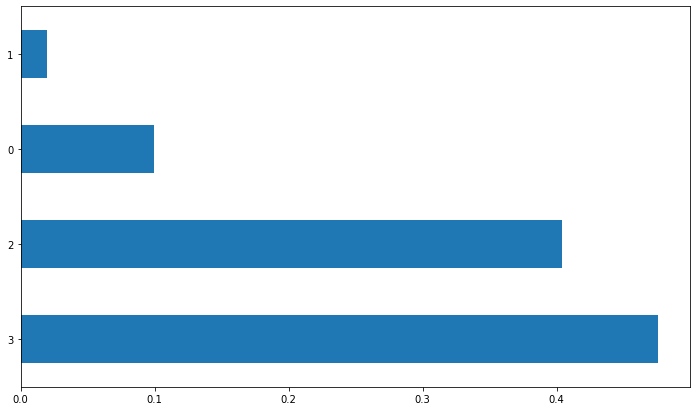

In [ ]:
feature_imp(X, rf_clf).plot(kind='barh', figsize=(12,7), legend=False)

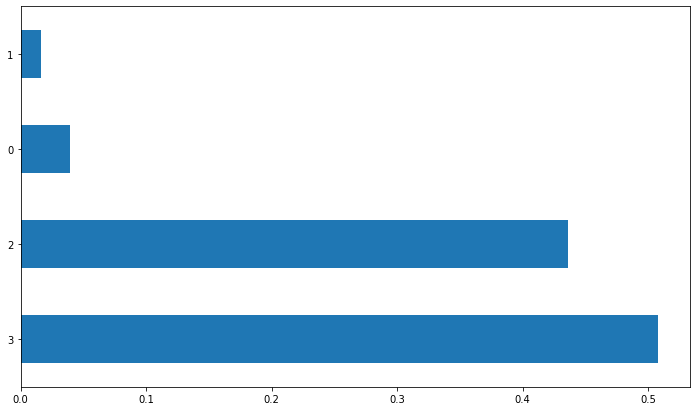

In [ ]:
feature_imp(X, xgb_clf).plot(kind='barh', figsize=(12,7), legend=False)